In [1]:
#!/usr/bin/python2.7

from analysis_lib import *


#INLINE = False
INLINE = True
if INLINE:
  %matplotlib inline
else:
  matplotlib.use("Agg")


np.set_printoptions(precision=8, linewidth=999999999)

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /

In [2]:

#nmo, clsd, ndets, acti, nstates, natoms = 26, 7, 4, 2, 3, 6
#nmo, clsd, ndets, acti, nstates, natoms = 66, 18, 400, 6, 3, 12
#nmo, clsd, ndets, acti, nstates, natoms = 66, 19, 36, 4, 3, 12
# benzene wigner test

datas_process = [
plottables( "/home/adurden/conda/ethylene/fomo_benfix2_read/", "benfix2", DoStateProjections=True, DoSDiagnostic=True ),
#plottables( "/home/adurden/conda/ethylene/engtest2/", "engtest", DoStateProjections=False, DoSDiagnostic=False ),
#plottables( "/home/adurden/conda/ethylene/engtest4/", "fix", DoStateProjections=False, DoSDiagnostic=False ),
#plottables( "/home/adurden/jobs/seawulf_jobs/benzene/1/", "1", DoStateProjections=True, DoSDiagnostic=True ),
#plottables( "/home/adurden/jobs/seawulf_jobs/benzene/2/", "2", DoStateProjections=True, DoSDiagnostic=True ),
#plottables( "/home/adurden/jobs/seawulf_jobs/benzene/3/", "3", DoStateProjections=True, DoSDiagnostic=True ),
#plottables( "/home/adurden/jobs/seawulf_jobs/benzene/4/", "4", DoStateProjections=True, DoSDiagnostic=True ),
#plottables( "/home/adurden/jobs/seawulf_jobs/benzene/5/", "5", DoStateProjections=True, DoSDiagnostic=True ),
]


get_h5data runtime:   1.276720 seconds
init_params runtime:   0.004192 seconds
Making benfix2.xyz...
get_state_engs runtime:   4.554661 seconds
Starting get_S_diagnostics, this may take several minutes for large systems with many steps
get_S_diagnostics runtime:   3.923649 seconds
get_fomodata runtime:   1.116935 seconds
get_state_projections runtime:   0.429125 seconds
get_rmsgrad runtime:   0.159105 seconds
Total benfix2 runtime:  11.576189 seconds


In [3]:
plt.clf()
# Window range in femtoseconds
#start, end = 25.8,26
start, end = 0, 1000


for data in datas_process:
  data.starti, data.endi = data.fs2index_range(start,end)
  print((data.starti, data.endi))
  print((data.time[data.endi]))

print(datas_process[0].fs2index_range(240,250))

#print((datas[0].starti, datas[0].endi))


(0, 7566)
182.8792560000228
(7566, 7566)


<Figure size 432x288 with 0 Axes>

In [4]:
# select which data to plot
#datas = datas_process
#datas = [datas_process[1]]
datas = [datas_process[0]]
#datas = datas_process[3:]
# If we have multiple datasets, align their relative energies with each other
if len(datas) > 1:
  min_e = min( [min(x) for x in [z.tot for z in datas] ]  )
  #print(min_e)
  for data in datas:
    data.reltot = [ (z-min_e)*27.2114 for z in data.tot ]

INLINE = True
if INLINE:
  %matplotlib inline
else:
  matplotlib.use("Agg")

<Figure size 432x288 with 0 Axes>

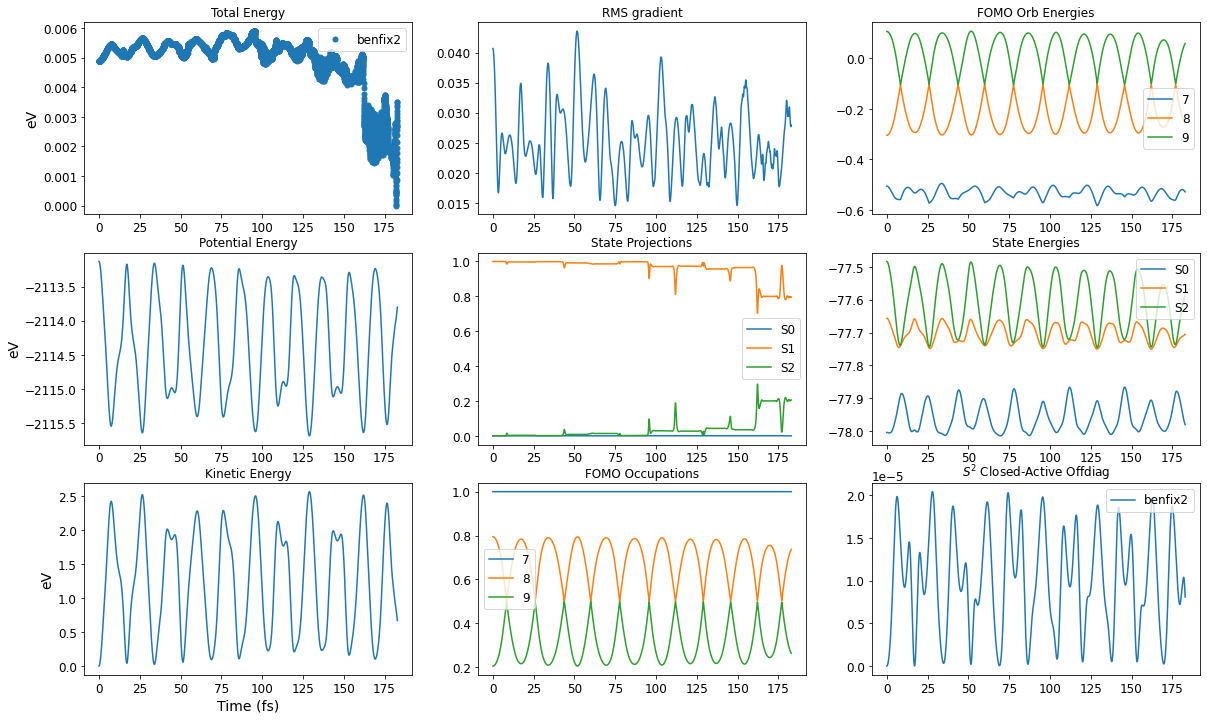

In [10]:


plt.clf()
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(20)
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(334)
ax3 = fig.add_subplot(337)
ax4 = fig.add_subplot(332)
ax8 = fig.add_subplot(335)
ax9 = fig.add_subplot(338)
ax7 = fig.add_subplot(333)
ax5 = fig.add_subplot(336)
ax6 = fig.add_subplot(339)
ax1.title.set_text('Total Energy')
for data in datas:
  ax1.plot(data.time[data.starti:data.endi], data.reltot[data.starti:data.endi], 'o', markersize=5, label=data.label)
ax1.legend()
ax1.set_ylabel("eV")

ax2.title.set_text('Potential Energy')
for data in datas:
  ax2.plot(data.time[data.starti:data.endi], data.pe[data.starti:data.endi], '-', label=data.label)
ax2.set_ylabel("eV")

ax3.title.set_text('Kinetic Energy')
for data in datas:
  ax3.plot(data.time[data.starti:data.endi], data.ke[data.starti:data.endi], '-', label=data.label)
ax3.set_ylabel("eV")
ax3.set_xlabel("Time (fs)")

ax4.title.set_text('RMS gradient')
for data in datas:
  ax4.plot(data.time[data.starti:data.endi], data.rmsgrad[data.starti:data.endi], '-', label=data.label)

#ax5.title.set_text(r"$\Sigma S^2$")
#for data in datas:
#  if data.DoSDiagnostic:
#    ax5.plot(data.time[data.starti:data.endi], data.S_sq_actisum[data.starti:data.endi], '-', label=data.label)

ax5.title.set_text("State Energies")
for data in datas:
  for state in range(0,data.nstates):
    ax5.plot(data.time[data.starti:data.endi], data.state_eng[state][data.starti:data.endi], '-', label='S'+str(state))
ax5.legend()
    

ax6.title.set_text(r"$S^2$ Closed-Active Offdiag")
for data in datas:
  if data.DoSDiagnostic:
    ax6.plot(data.time[data.starti:data.endi], data.S_sq_oos[data.starti:data.endi], '-', label=data.label)
ax6.legend()                   

ax7.title.set_text("FOMO Orb Energies")
for data in datas:
  if data.DoFOMO:
    for i in range(data.clsd, data.clsd+data.acti+1):
      #ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], 'o', label=data.label+' Orb '+str(i))
      ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], '-', label=str(i))
      pass
    #ax7.plot(data.time[data.starti:data.endi], (np.array(data.fomo_eng[20][data.starti:data.endi]) - np.array(data.fomo_eng[21][data.starti:data.endi])) , 'o')
ax7.legend()


ax9.title.set_text("FOMO Occupations")
for data in datas:
  if data.DoFOMO:
    for i in range(data.clsd, data.clsd+data.acti+1):
      #ax9.plot(data.time[data.starti:data.endi], data.fomo_occ[i][data.starti:data.endi], 'o', label=str(i))
      ax9.plot(data.time[data.starti:data.endi], data.fomo_occ[i][data.starti:data.endi], '-', label=str(i))
      pass
ax9.legend()

ax8.title.set_text("State Projections")
for data in datas:
  if data.DoStateProjections:
    for i in range(0,data.nstates):
      ax8.plot(data.time[data.starti:data.endi], data.state_proj[i][data.starti:data.endi], '-', label='S'+str(i))
ax8.legend()


plt.show()
matplotlib.use("Agg")
plt.savefig("test.png", dpi=255)


<Figure size 432x288 with 0 Axes>

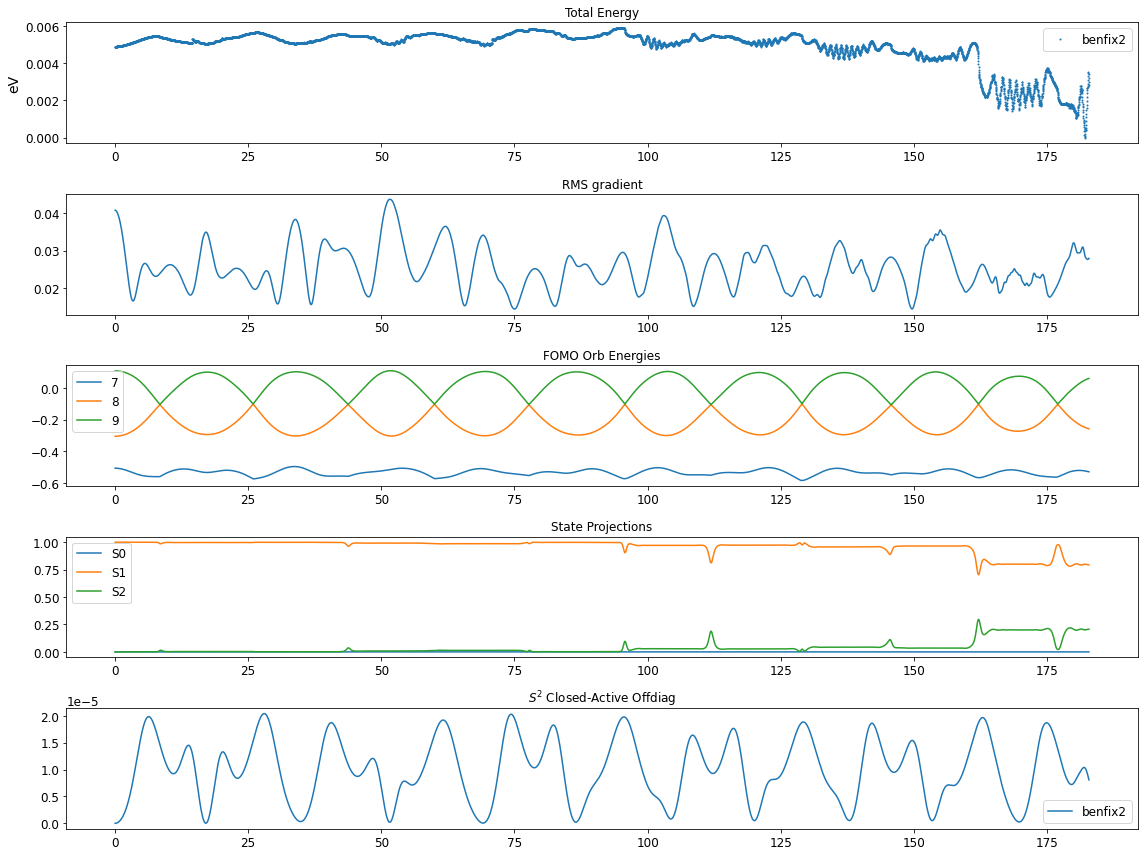

In [6]:

plt.clf()
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(16)
ax1 = fig.add_subplot(511)
ax4 = fig.add_subplot(512)
ax7 = fig.add_subplot(513)
ax8 = fig.add_subplot(514)
ax9 = fig.add_subplot(515)
ax1.title.set_text('Total Energy')
for data in datas:
  ax1.plot(data.time[data.starti:data.endi], data.reltot[data.starti:data.endi], 'o', markersize=1, label=data.label)
ax1.legend()
ax1.set_ylabel("eV")


ax4.title.set_text('RMS gradient')
for data in datas:
  ax4.plot(data.time[data.starti:data.endi], data.rmsgrad[data.starti:data.endi], '-', label=data.label)
             

ax7.title.set_text("FOMO Orb Energies")
for data in datas:
  if data.DoFOMO:
    for i in range(data.clsd, data.clsd+data.acti+1):
      #ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], 'o', label=data.label+' Orb '+str(i))
      ax7.plot(data.time[data.starti:data.endi], data.fomo_eng[i][data.starti:data.endi], '-', label=str(i))
      pass
    #ax7.plot(data.time[data.starti:data.endi], (np.array(data.fomo_eng[20][data.starti:data.endi]) - np.array(data.fomo_eng[21][data.starti:data.endi])) , 'o')
ax7.legend()

ax9.title.set_text(r"$S^2$ Closed-Active Offdiag")
for data in datas:
  if data.DoSDiagnostic:
    ax9.plot(data.time[data.starti:data.endi], data.S_sq_oos[data.starti:data.endi], '-', label=data.label)
ax9.legend()     

ax8.title.set_text("State Projections")
for data in datas:
  if data.DoStateProjections:
    for i in range(0,data.nstates):
      ax8.plot(data.time[data.starti:data.endi], data.state_proj[i][data.starti:data.endi], '-', label='S'+str(i))
ax8.legend()


plt.show()
matplotlib.use("Agg")
plt.tight_layout()
plt.savefig("test.png", dpi=255)


In [7]:
# CI vector rmsd plot

data = datas_process[0]

import rmsd

rmsd_s0x1 = []
ci_0x1_path = "/home/adurden/conda/benzene/ciopt_0_1/ci_0x1.xyz"
ci_0x1 = np.array(xyz_read(ci_0x1_path)[1])
for i in range(data.starti+1,data.endi+1):
  temp = np.array(xyz_read( data.d+"/electronic/"+str(i)+"/temp.xyz")[1])
  rmsd_s0x1.append( rmsd.rmsd( ci_0x1, temp) )
rmsd_s0x1 = np.array(rmsd_s0x1)

rmsd_s1x2 = []
ci_1x2_path = "/home/adurden/conda/benzene/ciopt_1_2/ci_1x2.xyz"
ci_1x2 = np.array(xyz_read(ci_1x2_path)[1])
for i in range(data.starti+1,data.endi+1):
  temp = np.array(xyz_read( data.d+"/electronic/"+str(i)+"/temp.xyz")[1])
  rmsd_s1x2.append( rmsd.rmsd( ci_1x2, temp) )
rmsd_s1x2 = np.array(rmsd_s1x2)

plt.clf()
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(4)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.title.set_text("RMSD to Conical Intersections")
ax1.plot(data.time[data.starti:data.endi], rmsd_s0x1[data.starti:data.endi], '-', label=r'RMSD $CI(S_0,S_1)$')
ax1.plot(data.time[data.starti:data.endi], rmsd_s1x2[data.starti:data.endi], '-', label=r'RMSD $CI(S_1,S_2)$')
ax1.set_ylabel("RMSD (Angstrom)")
ax1.legend()

ax2.title.set_text("State Projections")
if data.DoStateProjections:
  for i in range(0,data.nstates):
    ax2.plot(data.time[data.starti:data.endi], data.state_proj[i][data.starti:data.endi], '-', label='S'+str(i))
ax2.legend()
ax2.set_xlabel("Time (fs)")

INLINE = False
if INLINE:
  plt.show() 
else:
  plt.tight_layout() 
  plt.savefig("conical_intersection.png", dpi=255)


print(data.endi)
print(data.state_proj[0][data.endi])
print(sum([data.state_proj[0][data.endi], data.state_proj[1][data.endi], data.state_proj[2][data.endi] ]))

del data # just to avoid namespace conflicts in later cells


ValueError: operands could not be broadcast together with shapes (12,3) (6,3) 

In [ ]:
data = datas_process[0]

import nglview
import MDAnalysis as mda
filename = data.filelabel + ".xyz"
#print(filename)
u = mda.Universe(filename)
view = nglview.show_mdanalysis(u)
del data
view


In [ ]:

a = datas_process[0]
p = a.pe

for i in range(1,len(p)):
    if np.abs(p[i] - p[i-1]) > 0.1:
        print((i, np.abs(p[i] - p[i-1])))
        print( "{}: {}".format( i-1, float(scan_outfile(a.d+"electronic/"+str(i-1)+"/tc.out", ["Final", "TDCI", "Energy:"], 3))  ))
        print( "{}: {}".format( i, float(scan_outfile(a.d+"electronic/"+str(i)+"/tc.out", ["Final", "TDCI", "Energy:"], 3))  ))
        print( "{}: {}".format( i+1, float(scan_outfile(a.d+"electronic/"+str(i+1)+"/tc.out", ["Final", "TDCI", "Energy:"], 3))  ))
        print(a.d+"electronic/"+str(i)+"/tc.out")
        print(p[i])

    
#pe = float(scan_outfile(path+"/test"+pathn+".out", ["Final", "TDCI", "Energy:"], 3))


In [ ]:
# This plot wont work if you don't have the same timesteps on all your trajectories...

#datas = [datas_process[0]]
datas = datas_process

# Plot averages
plt.clf()
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(7)

last_endi = min([x.endi for x in datas] )
print(last_endi)

avgTot = np.mean( np.array([a.tot[a.starti:last_endi] for a in datas]), axis=0 )
avgPE = np.mean( np.array([a.pe[a.starti:last_endi] for a in datas]), axis=0 )
avgKE = np.mean( np.array([a.ke[a.starti:last_endi] for a in datas]), axis=0 )

if len(datas) > 1:
  min_e = min( [min(x) for x in [z.tot for z in datas] ]  )
  #print(min_e)
  for data in datas:
    data.reltot = [ (z-min_e)*27.2114 for z in data.tot ]
  avgTot = [ (z-min_e)*27.2114 for z in avgTot ]


avgstate_proj = []
for i in range(0,datas[0].nstates):
  avgstate_proj.append( np.mean( np.array( [ a.state_proj[i][a.starti:last_endi] for a in datas] ), axis=0 ) )


rgb = rgb_linspace( datas[0].nstates)


#ax1 = fig.add_subplot(211)
#ax2 = fig.add_subplot(212)
ax2 = fig.add_subplot(111)
#ax1.title.set_text('Total Energy')
#for data in datas:
#  ax1.plot(data.time[data.starti:data.endi], data.tot[data.starti:data.endi], 'b-', alpha=0.6, label=data.label)
#ax1.plot(datas[0].time[datas[0].starti:datas[0].endi], avgTot, 'o', label="Avg")
#ax1.legend()
#ax1.set_ylabel("eV")

ax2.title.set_text("State Projections")
for data in datas:
  if data.DoStateProjections:
    for i in range(0,data.nstates):
      ax2.plot(data.time[data.starti:data.endi], data.state_proj[i][data.starti:data.endi], '-', alpha=0.6, color=rgb[i])
for i in range(0,datas[0].nstates):
  ax2.plot(data.time[data.starti:last_endi], avgstate_proj[i][data.starti:last_endi], 'o', color=rgb[i], label=r'Avg $S_{i}$'.format(i=i))
    
ax2.legend()

plt.show() 
plt.savefig("benzene_proj.png", dpi=255)


In [ ]:
plt.clf()
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(7)
ax1 = fig.add_subplot(111)
ax1.title.set_text('Total Energy')
for data in datas:
  ax1.plot(data.time[data.starti:data.endi], data.reltot[data.starti:data.endi], 'b-', alpha=0.6, label=data.label)
ax1.plot(datas[0].time[datas[0].starti:last_endi], avgTot, 'o', label="Avg")
ax1.legend()
ax1.set_ylabel("eV")

plt.show()
matplotlib.use("Agg")
plt.savefig("engs_all.png", dpi=255)

In [ ]:
datas[0].d

In [ ]:
sum([4.97997e-01, 3.67200e-01, 1.22354e-01])